In [1]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

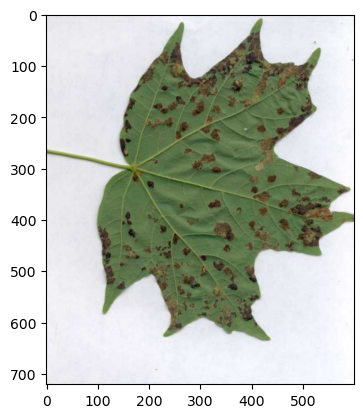

In [2]:
main_img = cv2.imread("leaf2.jpg")
img = cv2.cvtColor(main_img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [3]:
img.shape[0]

721

In [4]:
img.shape[1]

600

In [5]:
b = main_img[:, :, 0]
g = main_img[:, :, 1]
r = main_img[:, :, 2]

In [14]:
Disease1 = r - g
Disease = r - g

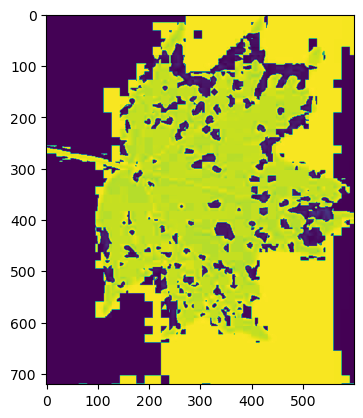

In [15]:
plt.imshow(Disease1)

In [16]:
for i in range(0, main_img.shape[0]):
        for j in range(0, main_img.shape[1]):
            if int(g[i, j]) > 150:
                Disease[i, j] = 255

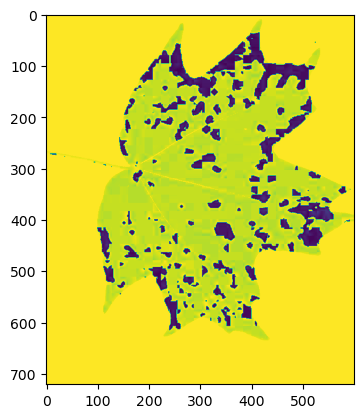

In [17]:
plt.imshow(Disease)

## Why Alpha ?

To remove the Background noise and also to calculate percentage disease.

We need to sample the input image as a whole

In [19]:
def GetAlpha(OriginalImage):
    global Alpha
    for i in range(0, main_img.shape[0]):
        for j in range(0, main_img.shape[1]):
            if main_img[i, j, 0] > 200 and main_img[i, j, 1] > 200 and main_img[i, j, 2] > 200:
                Alpha[i, j] = 255
            else:
                Alpha[i, j] = 0

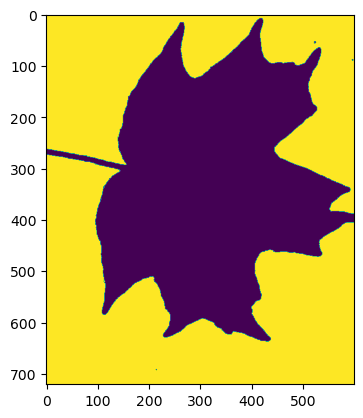

In [20]:
global Alpha
Alpha = b
GetAlpha(main_img)
plt.imshow(Alpha)

### Calculating Diseased percentage

Percentage Disease = (Number of black pixels in Disease Image / Number of black pixels in Alpha Channel) × 100

In [32]:
Count = 0
Res = 0
for i in range(0, Disease.shape[0]):
    for j in range(0, Disease.shape[1]):
            if Alpha[i, j] == 0:
                Res += 1
            if Disease[i, j] < 150:
                Count += 1
Percent = (Count / Res) * 100
print("Percentage Disease: " + str(round(Percent, 2)) + "%")

Percentage Disease: 19.19%
